In [2]:
from BiasedErasure.delayed_erasure_decoders.Experimental_Loss_Decoder import *
import numpy as np

num_rounds = 5
distance = 5
decoder_basis = 'X'
gate_ordering = ['N', 'Z', 'Zr', 'Nr']
noise_params = {'idle_loss_rate': 2.793300220405646e-07, 'idle_error_rate': np.array([6.60547942e-09, 3.38336163e-08, 2.67533789e-07]),
                'entangling_zone_error_rate': np.array([3.66476387e-04, 6.14732819e-06, 2.35857048e-03]),
                'entangling_gate_error_rate': [2.2260729018707513e-05, 0.00017139584089578063, 0.0012948317242757047, 2.2260729018707513e-05, 0, 0, 0, 0.00017139584089578063, 0, 0, 0, 0.0012948317242757047, 0, 0, 0.002621736717313752],
                'entangling_gate_loss_rate': 0.00039272255674060926, 'single_qubit_error_rate': np.array([1.53681034e-05, 9.93583065e-04, 1.94650113e-05]),
                'reset_error_rate': 5.89409983290463e-05, 'measurement_error_rate': 0.0006138700821647161, 'reset_loss_rate': 0.0007531131027610011, 'measurement_loss_rate': 0.07131074481520218, 'ancilla_idle_loss_rate': 1.6989311035347498e-07,
                'ancilla_idle_error_rate': np.array([1.46727589e-07, 4.60893305e-08, 2.30298714e-06]), 'ancilla_reset_error_rate': 0.024549181355318986, 'ancilla_measurement_error_rate': 0.0012815874700447462, 'ancilla_reset_loss_rate': 0.00019528486460263086, 'ancilla_measurement_loss_rate': 0.00047357577582906143,
                'gate_noise': LogicalCircuit.ancilla_data_differentiated_gate_noise, 'idle_noise': LogicalCircuit.ancilla_data_differentiated_idle_noise}



Meta_params = {
    'architecture': 'CBQC', 'code': 'Rotated_Surface', 'logical_basis': decoder_basis,
    'bias_preserving_gates': 'False', 'noise': 'atom_array', 'is_erasure_biased': 'False',
    'LD_freq': '1000', 'LD_method': 'None', 'SSR': 'True', 'cycles': str(num_rounds - 1),
    'ordering': gate_ordering, 'decoder': 'MLE', 'circuit_type': 'memory',
    'Steane_type': 'regular', 'printing': 'False', 'num_logicals': '1',
    'loss_decoder': 'independent', 'obs_pos': 'd-1', 'n_r': '0', 'circuit_index': 0
}
noise_params = {'idle_loss_rate': 2.1462892652881424e-07, 'idle_error_rate': np.array([5.31106535e-09, 2.59649716e-08, 2.70017446e-07]), 'entangling_zone_error_rate': np.array([3.22871520e-04, 5.55115000e-06, 1.28240286e-03]), 'entangling_gate_error_rate': [1.8729598643991336e-05, 0.00016597465639499589, 0.0013401575256883555, 1.8729598643991336e-05, 0, 0, 0, 0.00016597465639499589, 0, 0, 0, 0.0013401575256883555, 0, 0, 0.0026654438378731237], 'entangling_gate_loss_rate': 0.0012268907363777474, 'single_qubit_error_rate': np.array([9.01549152e-06, 8.45064836e-04, 1.91825416e-05]), 'reset_error_rate': 0.00013112864576086654, 'measurement_error_rate': 0.003220085408683493, 'reset_loss_rate': 0.0007849977760100565, 'measurement_loss_rate': 0.06657247422436202, 'ancilla_idle_loss_rate': 1.7048289168299613e-07, 'ancilla_idle_error_rate': np.array([1.30011070e-07, 3.79578658e-08, 3.73757626e-06]), 'ancilla_reset_error_rate': 0.02267054400731952, 'ancilla_measurement_error_rate': 0.011477399332064406, 'ancilla_reset_loss_rate': 0.00014151808789913066, 'ancilla_measurement_loss_rate': 0.0004062050339110557,
                'gate_noise':LogicalCircuit.ancilla_data_differentiated_gate_noise,
            'idle_noise':LogicalCircuit.ancilla_data_differentiated_idle_noise}


simulate_data = True
num_shots = 100
if simulate_data:
    detection_events_signs = None
    measurement_events, _, _, circuit = get_simulated_measurement_events(Meta_params, distance, distance, num_shots, noise_params)


else:
    # measurement_events, detection_events, observable_flips, circuit = get_simulated_measurement_events(Meta_params, distance, distance, 1, noise_params)
    # detection_events, observable_flips = circuit.compile_m2d_converter().convert(measurements=exp_measurements.astype(bool), separate_observables=True)    
    # detection_events_signs = -np.sign(2*np.nanmean(detection_events.astype(int), axis=0)-1).astype(int) # Find detection event signs (not needed anymore)
    detection_events_signs = None
    exp_measurements = np.load(f'measurement_events_{decoder_basis}_NZZrNr_2024_10_06.npy')#[:1000, :]
    measurement_events = exp_measurements[:num_shots]

# Now let's decode!
use_loss_decoding = True  # if False: use same DEM every shot, without utilizing SSR.
use_independent_decoder = True  # if False: in every lifecycle, we just apply supercheck at the end. If True: we count the full lifecycle with different potential loss locations and corresponding Clifford propagations.
use_independent_and_first_comb_decoder = False  # This is relevant only if use_independent_decoder=True. If False: use only independent lifecycles. If True: adds a single combination of lifecycles to the decoder.
output_dir = '/Users/gefenbaranes/Documents/memory_experiment'
logical_gap = False
# circuit = get_lossless_circuit(Meta_params, distance, distance, noise_params)

# DO IT
if not logical_gap:
    predictions, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                        measurement_events,
                                                                        detection_events_signs, use_loss_decoding,
                                                                        use_independent_decoder,
                                                                        use_independent_and_first_comb_decoder,
                                                                        logical_gaps=False,
                                                                        noise_params=noise_params, num_shots=num_shots)
    logical_probability = np.mean(np.logical_xor(observable_flips, predictions))
    
else:
    predictions, log_probabilities, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                        measurement_events,
                                                                        detection_events_signs, use_loss_decoding,
                                                                        use_independent_decoder,
                                                                        use_independent_and_first_comb_decoder,
                                                                        logical_gaps=True, 
                                                                        noise_params=noise_params, num_shots=num_shots)

    logical_probability = np.mean(np.logical_xor(observable_flips.flatten(), predictions[:, 0]))


print('logical error',logical_probability)

# error bar: (np.sqrt(P*(1-P)/num_shots))

final measurement_index = 121
final measurement_index = 121
0 logical error 0.02


### compare measurements:

final measurement_index = 121


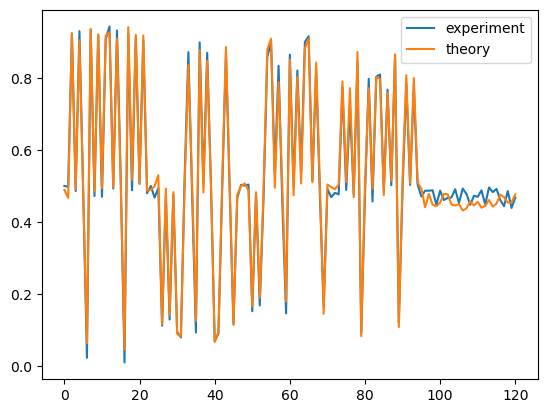

In [2]:

import matplotlib.pyplot as plt
from BiasedErasure.delayed_erasure_decoders.Experimental_Loss_Decoder import *
import numpy as np

num_rounds = 5
distance = 5
decoder_basis = 'X'
gate_ordering = ['N', 'Z', 'Zr', 'Nr']
noise_params = {'idle_loss_rate': 2.793300220405646e-07, 'idle_error_rate': np.array([6.60547942e-09, 3.38336163e-08, 2.67533789e-07]),
                'entangling_zone_error_rate': np.array([3.66476387e-04, 6.14732819e-06, 2.35857048e-03]),
                'entangling_gate_error_rate': [2.2260729018707513e-05, 0.00017139584089578063, 0.0012948317242757047, 2.2260729018707513e-05, 0, 0, 0, 0.00017139584089578063, 0, 0, 0, 0.0012948317242757047, 0, 0, 0.002621736717313752],
                'entangling_gate_loss_rate': 0.00039272255674060926, 'single_qubit_error_rate': np.array([1.53681034e-05, 9.93583065e-04, 1.94650113e-05]),
                'reset_error_rate': 5.89409983290463e-05, 'measurement_error_rate': 0.0006138700821647161, 'reset_loss_rate': 0.0007531131027610011, 'measurement_loss_rate': 0.07131074481520218, 'ancilla_idle_loss_rate': 1.6989311035347498e-07,
                'ancilla_idle_error_rate': np.array([1.46727589e-07, 4.60893305e-08, 2.30298714e-06]), 'ancilla_reset_error_rate': 0.024549181355318986, 'ancilla_measurement_error_rate': 0.0012815874700447462, 'ancilla_reset_loss_rate': 0.00019528486460263086, 'ancilla_measurement_loss_rate': 0.00047357577582906143,
                'gate_noise': LogicalCircuit.ancilla_data_differentiated_gate_noise, 'idle_noise': LogicalCircuit.ancilla_data_differentiated_idle_noise}



Meta_params = {
    'architecture': 'CBQC', 'code': 'Rotated_Surface', 'logical_basis': decoder_basis,
    'bias_preserving_gates': 'False', 'noise': 'atom_array', 'is_erasure_biased': 'False',
    'LD_freq': '1000', 'LD_method': 'None', 'SSR': 'True', 'cycles': str(num_rounds - 1),
    'ordering': gate_ordering, 'decoder': 'MLE', 'circuit_type': 'memory',
    'Steane_type': 'regular', 'printing': 'False', 'num_logicals': '1',
    'loss_decoder': 'independent', 'obs_pos': 'd-1', 'n_r': '0', 'circuit_index': 0
}
noise_params = {'idle_loss_rate': 2.1462892652881424e-07, 'idle_error_rate': np.array([5.31106535e-09, 2.59649716e-08, 2.70017446e-07]), 'entangling_zone_error_rate': np.array([3.22871520e-04, 5.55115000e-06, 1.28240286e-03]), 'entangling_gate_error_rate': [1.8729598643991336e-05, 0.00016597465639499589, 0.0013401575256883555, 1.8729598643991336e-05, 0, 0, 0, 0.00016597465639499589, 0, 0, 0, 0.0013401575256883555, 0, 0, 0.0026654438378731237], 'entangling_gate_loss_rate': 0.0012268907363777474, 'single_qubit_error_rate': np.array([9.01549152e-06, 8.45064836e-04, 1.91825416e-05]), 'reset_error_rate': 0.00013112864576086654, 'measurement_error_rate': 0.003220085408683493, 'reset_loss_rate': 0.0007849977760100565, 'measurement_loss_rate': 0.06657247422436202, 'ancilla_idle_loss_rate': 1.7048289168299613e-07, 'ancilla_idle_error_rate': np.array([1.30011070e-07, 3.79578658e-08, 3.73757626e-06]), 'ancilla_reset_error_rate': 0.02267054400731952, 'ancilla_measurement_error_rate': 0.011477399332064406, 'ancilla_reset_loss_rate': 0.00014151808789913066, 'ancilla_measurement_loss_rate': 0.0004062050339110557,
                'gate_noise':LogicalCircuit.ancilla_data_differentiated_gate_noise,
            'idle_noise':LogicalCircuit.ancilla_data_differentiated_idle_noise}




num_shots = 1000
measurement_events, _, _, circuit = get_simulated_measurement_events(Meta_params, distance, distance, num_shots, noise_params)
measurement_events[measurement_events == 2] = 0 #change all values in detection_events from 2 to 0

exp_measurements = np.load(f'measurement_events_{decoder_basis}_NZZrNr_2024_10_06.npy')#[:1000, :]
exp_measurements = exp_measurements[:num_shots]

exp_measurements[exp_measurements == 2] = 0 #change all values in detection_events from 2 to 0

plt.plot(np.average(exp_measurements,axis=0), label='experiment')

plt.plot(np.average(measurement_events,axis=0), label='theory')

plt.legend()

### Memory wrong without loss decoding:

In [3]:
circuit_type = 'memory_wrong'
prep_basis = 'Z'
num_rounds_decoding = 1
output_dir = '/Users/gefenbaranes/Documents/memory_experiment'
distance = 5
simulate_data = False
num_shots = 2
detection_events_signs = None
logical_gap = False
use_loss_decoding = False
if simulate_data:
        measurement_events, _, _, circuit = get_simulated_measurement_events(Meta_params, distance, distance, num_shots, noise_params)
        # measurement_events_no_loss = measurement_events.copy() 
        # measurement_events_no_loss[measurement_events_no_loss == 2] = 0
        # measurement_events = measurement_events_no_loss.copy()

else:  
        measurement_events = np.load(f"{output_dir}/2024_10_22_datafordebugging_{prep_basis}_memory_wrong_0cycles.npy")

Meta_params = {'architecture': 'CBQC', 'code': 'Rotated_Surface', 'logical_basis': prep_basis #decoder_basis
                , 'bias_preserving_gates': 'False', 
                'noise': 'atom_array', 'is_erasure_biased': 'False', 'LD_freq': '1000', 'LD_method': 'FREE', 'SSR': 'True', 'cycles': str(num_rounds_decoding - 1),
                        'ordering': gate_ordering,
                        'decoder': 'MLE',
                'circuit_type': circuit_type, 'Steane_type': 'regular', 'printing': 'False', 'num_logicals': '1', 'loss_decoder': 'independent', 
                        'obs_pos': 'd-1', 'n_r': '0', 'circuit_index': '0'}
if not logical_gap:
        predictions, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir,
                                                                                measurement_events,
                                                                                detection_events_signs, use_loss_decoding,
                                                                                use_independent_decoder,
                                                                                use_independent_and_first_comb_decoder,
                                                                                logical_gaps=False,
                                                                                noise_params=noise_params, num_shots=num_shots)
        logical_probability = np.mean(np.logical_xor(observable_flips, predictions))


print(logical_probability)

if logical_gap:
        predictions, log_probabilities, observable_flips, dems_list = Loss_MLE_Decoder_Experiment(Meta_params, distance, distance, output_dir, measurement_events,
                                None, use_loss_decoding, use_independent_decoder, use_independent_and_first_comb_decoder,
                                        logical_gaps = True)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-24
0.4576
